In [ ]:
import pandas as pd
import numpy as np

#for feature importance and scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#training and optimization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

# For saving the model
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Defining and dropping features with more than 30% data missing

In [ ]:
# Define the percentage threshold
percent = 30

# Calculate the percentage of missing values in each column
missing_percent_per_column = (df.isnull().sum() / len(df)) * 100

# Drop columns exceeding the threshold
columns_to_drop = missing_percent_per_column[missing_percent_per_column > percent].index
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Examining the new dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**FEATURE ENGINEERING And FEATURE IMPORTANCE **

In [ ]:
# Splitting into numeric columns
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [ ]:
# Splitting into non-numeric columns
categorical_columns = df.select_dtypes(exclude=['number'])
categorical_columns.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [ ]:
# Encoding the object values to numeric data types
le = LabelEncoder()
for col in categorical_columns.columns:
    categorical_columns[col] = le.fit_transform(categorical_columns[col])
categorical_columns.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [ ]:
# Combining the two dataframes
combined_df = pd.concat([numeric_columns, categorical_columns], axis=1)
combined_df.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,5375,0,1,0,0,1,0,...,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,3962,1,0,0,1,0,0,...,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,2564,1,0,0,1,0,0,...,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,5535,1,0,0,0,1,0,...,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,6511,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,925,1


In [ ]:
# Split target and feature variables
y = combined_df['Churn']
X = combined_df.drop('Churn',axis=1)

In [ ]:
# Train the model
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [ ]:
# Retrieving important features
feature_names = X.columns
feature_importance = model.feature_importances_

# Sorting the feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting the features in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,tenure,0.155372
2,MonthlyCharges,0.147447
19,TotalCharges,0.134250
3,customerID,0.131724
16,Contract,0.076642
10,OnlineSecurity,0.044905
18,PaymentMethod,0.044437
13,TechSupport,0.041433
9,InternetService,0.026641
11,OnlineBackup,0.023977


In [ ]:
# Select the top 10 features based on importance
top_10_features = feature_importance_df['Feature'].values[:11]
top_10_features

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID',
       'Contract', 'OnlineSecurity', 'PaymentMethod', 'TechSupport',
       'InternetService', 'OnlineBackup', 'gender'], dtype=object)

In [ ]:
# Assign the top 5 features to X
X = X[top_10_features]
X.head()

,tenure,MonthlyCharges,TotalCharges,customerID,Contract,OnlineSecurity,PaymentMethod,TechSupport,InternetService,OnlineBackup,gender
0,1,29.85,2505,5375,0,0,2,0,0,2,0
1,34,56.95,1466,3962,1,2,3,0,0,0,1
2,2,53.85,157,2564,0,2,3,0,0,2,1
3,45,42.30,1400,5535,1,2,0,2,0,0,1
4,2,70.70,925,6511,0,0,2,0,1,0,0


In [ ]:
X.drop('customerID', axis=1, inplace=True)   # i don't see how customer ID contribute to churn
X

<ipython-input-16-38332c0907b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('customerID', axis=1, inplace=True)   # i don't see how customer ID contribute to churn


,tenure,MonthlyCharges,TotalCharges,Contract,OnlineSecurity,PaymentMethod,TechSupport,InternetService,OnlineBackup,gender
0,1,29.85,2505,0,0,2,0,0,2,0
1,34,56.95,1466,1,2,3,0,0,0,1
2,2,53.85,157,0,2,3,0,0,2,1
3,45,42.30,1400,1,2,0,2,0,0,1
4,2,70.70,925,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1597,1,2,3,2,0,0,1
7039,72,103.20,5698,1,0,1,0,1,2,0
7040,11,29.60,2994,0,2,2,0,0,0,0
7041,4,74.40,2660,0,0,3,0,1,0,1


**EDA(Exploratory Data Analysis) ** **bold text**

In [ ]:
# Scaling the data values for training
sc=StandardScaler()
scaled_data = sc.fit_transform(X)

# Save the scaled_data
with open('scaled_data.pkl', 'wb') as file:
    pickle.dump(sc, file)

# Transform it into a dataframe
X = pd.DataFrame(scaled_data, columns=X.columns)
X.head()

,tenure,MonthlyCharges,TotalCharges,Contract,OnlineSecurity,PaymentMethod,TechSupport,InternetService,OnlineBackup,gender
0,-1.277445,-1.160323,-0.398608,-0.828207,-0.918838,0.398558,-0.925262,-1.183234,1.242550,-1.009559
1,0.066327,-0.259629,-0.948762,0.371271,1.407321,1.334863,-0.925262,-1.183234,-1.029919,0.990532
2,-1.236724,-0.362660,-1.641883,-0.828207,1.407321,1.334863,-0.925262,-1.183234,1.242550,0.990532
3,0.514251,-0.746535,-0.983710,0.371271,1.407321,-1.474052,1.396299,-1.183234,-1.029919,0.990532
4,-1.236724,0.197365,-1.235224,-0.828207,-0.918838,0.398558,-0.925262,0.172250,-1.029919,-1.009559


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#printing the shape of the dataset
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (7043, 21)


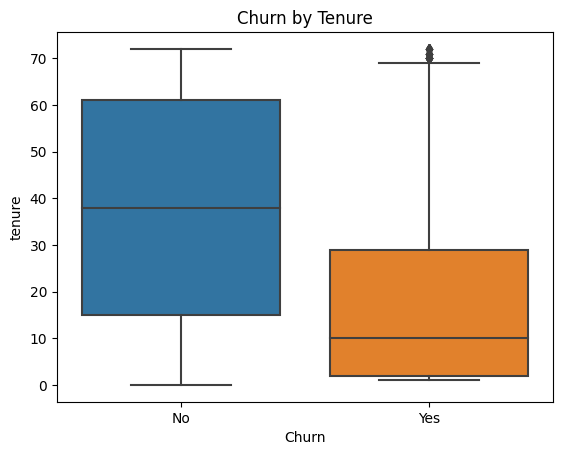

In [ ]:

# Assuming 'df' is your DataFrame
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Churn by Tenure")
plt.show()


The above graph suggest that customers who have stayed longer with the company is less likely to move to another company(churn)

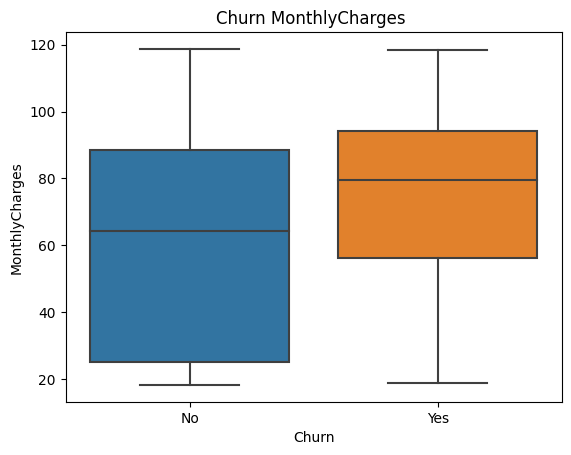

In [ ]:


# Assuming 'df' is your DataFrame
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Churn MonthlyCharges ")
plt.show()


The above graph suggest that customers with higher Monthly charges are more likely to move to another company(churn)

Since it makes more sense for total charges to be numeric I am changing total charges to numeric

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

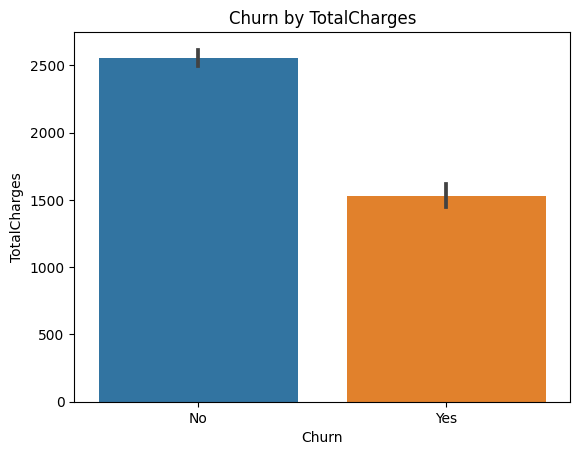

In [ ]:
sns.barplot(data=df,x="Churn", y="TotalCharges")
plt.title("Churn by TotalCharges")
plt.show()

The above graph suggest that customers with higher Monthly charges are more likely to move to another company(churn)

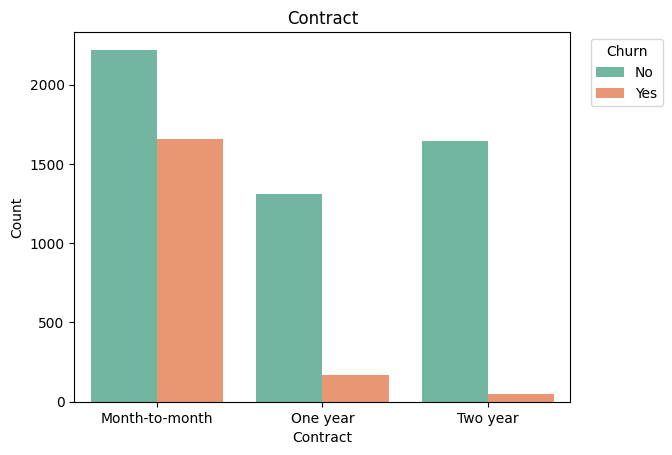

In [ ]:
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

From the distribution above, customer with month-to-month contracts churn the most, with one year contract, customers dont really churn and customers with a long last contract churn the least.

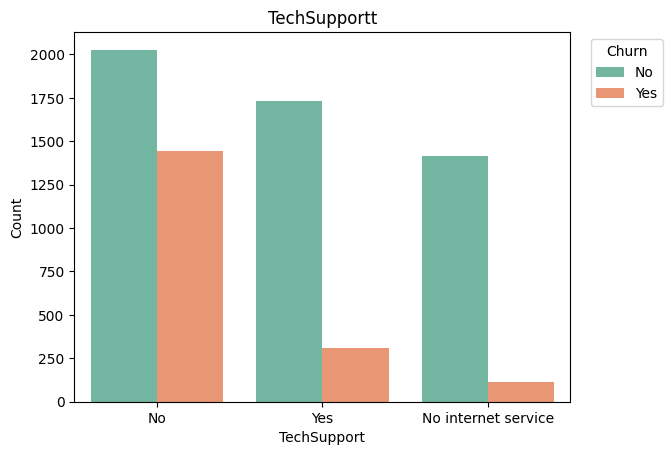

In [ ]:
sns.countplot(x="TechSupport", hue="Churn", data=df, palette="Set2")
plt.title("TechSupportt")
plt.xlabel("TechSupport")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

From the graph, it can be visualised that customers with no tech supports from the company churn a lot, with 'yes' to techsupport, a few customers with tech support churn and finally, and customers with no internet service churn the least

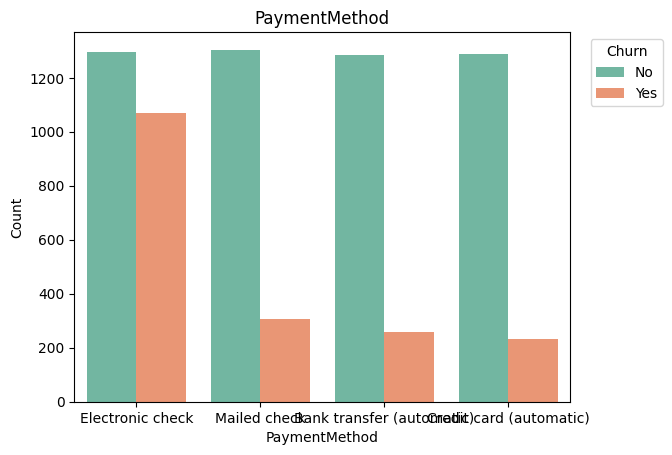

In [ ]:
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set2")
plt.title("PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

With various payment methods, customers that uses electronic checks churn a lot, it might be the case that its inconvinient

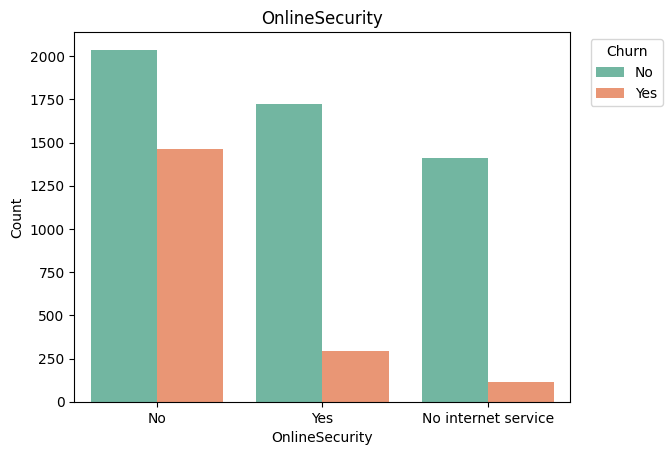

In [ ]:
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, palette="Set2")
plt.title("OnlineSecurity")
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

Customers with No online security churn the most compared to the others

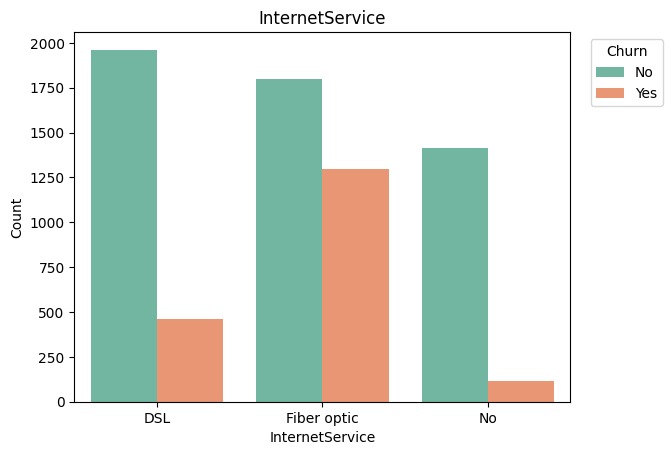

In [ ]:
sns.countplot(x="InternetService", hue="Churn", data=df, palette="Set2")
plt.title("InternetService")
plt.xlabel("InternetService")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

customers using fiber optic as internet service churn the most, followed by DSL and the least being customers with no internet service

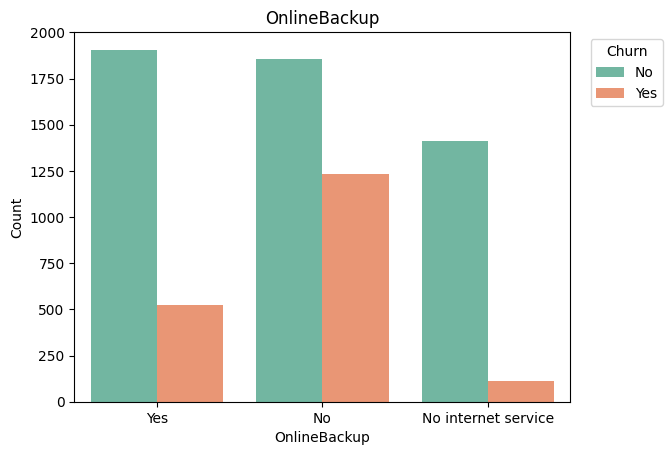

In [ ]:
sns.countplot(x="OnlineBackup", hue="Churn", data=df, palette="Set2")
plt.title("OnlineBackup")
plt.xlabel("OnlineBackup")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

customers with no online backup churn the most

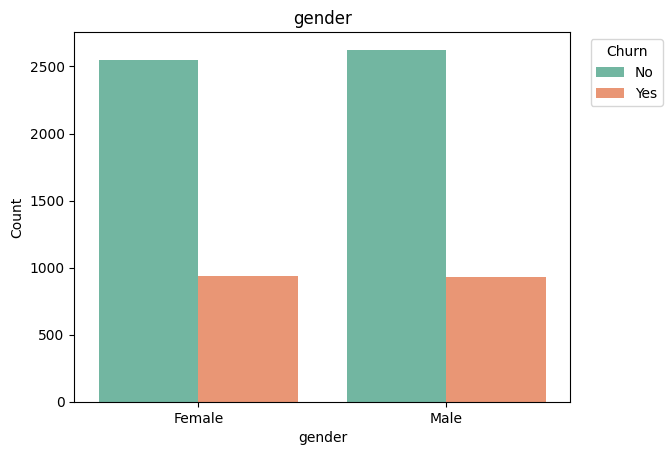

In [ ]:
sns.countplot(x="gender", hue="Churn", data=df, palette="Set2")
plt.title("gender")
plt.xlabel("gender")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()

it can be established from the graph that gender churn is almost at the same level with No, however, female customers churn a little more than male

**Multi-Layer Perceptron model using the Functional API** ****

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
#from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
# Splitting the dataset for training and testing
Xtrain, X_temp, Ytrain, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, Ytest = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Keras Functional API model
input_layer = Input(shape=(Xtrain.shape[1],))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(24, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [ ]:
model_results = model.fit(Xtrain, Ytrain, epochs=200, batch_size=32, validation_data=(X_val, y_val),callbacks =[early_stopping])

Epoch 1/200
177/177 [==============================] - 2s 3ms/step - loss: 0.5817 - accuracy: 0.7267 - val_loss: 0.5192 - val_accuracy: 0.7585
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7568 - val_loss: 0.4626 - val_accuracy: 0.7770
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7726 - val_loss: 0.4429 - val_accuracy: 0.7940
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7826 - val_loss: 0.4350 - val_accuracy: 0.7969
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7870 - val_loss: 0.4312 - val_accuracy: 0.7969
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7900 - val_loss: 0.4280 - val_accuracy: 0.7940
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7895 - val_loss: 0.4255 - val_accuracy: 0.7969

In [ ]:
_, accuracy = model.evaluate(Xtrain, Ytrain)
accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8009


80.08519411087036

In [ ]:
num_classes=1
epochs=200
batch_size=10

In [ ]:
# For model testing
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
!pip install tensorflow scikeras scikit-learn

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
num_classes=1
epochs=50
batch_size=10

In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_shape = (Xtrain.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((28)+neurons, activation=activation)(inputs)

  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((12)+neurons, activation=activation)(x)

  x= tf.keras.layers.Dropout(dropout_rate)(second)

  third=tf.keras.layers.Dense((4)+neurons, activation=activation)(x)

  x= tf.keras.layers.Dropout(dropout_rate)(third)

  fourth=tf.keras.layers.Dense((-4)+neurons, activation=activation)(x)

  x= tf.keras.layers.Dropout(dropout_rate)(fourth)

  fifth=tf.keras.layers.Dense((-12)+neurons, activation=activation)(x)

# Add output layer with softmax activation
  outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

# Create the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']

param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
grid_search.fit(Xtrain,Ytrain)
grid_search


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KerasClassifier(batch_size=10, epochs=50, model=<function create_model at 0x7ba349941d80>, verbose=0),
             param_grid={'model__activation': ['relu'],
                         'model__dropout_rate': [0.3, 0.5],
                         'model__neurons': [20],
                         'model__weight_constraint': [3.0, 5.0]},
             scoring='accuracy')

In [ ]:
best_gsparam = grid_search.best_params_
print("The best parameters :",best_gsparam)

The best parameters : {'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons': 20, 'model__weight_constraint': 3.0}


taking the best model

In [ ]:
bs_model = grid_search.best_estimator_
bs_model_arr = []
bs_model_arr.append(bs_model)

#predicting the xtest
x_pred = bs_model.predict(X_test)
accuracy = accuracy_score(Ytest, x_pred)
print(f"Accuracy is: {accuracy*100}")


Accuracy is: 81.27659574468085


In [ ]:
#validation accuracy
accuracies = []
val_pred = bs_model.predict(X_val)
accuracy = accuracy_score(y_val, val_pred)
accuracies.append(accuracy)
print(f"validation Accuracy is: {accuracy*100}")

validation Accuracy is: 79.82954545454545


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc = roc_auc_score(y_val,val_pred)
roc_auc

0.7261349414040278

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 6

# Create a k-fold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create your machine learning model
model = RandomForestClassifier()

# Perform k-fold cross-validation and get accuracy scores
cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", cross_val_scores)

# Print the average accuracy across all folds
print("Average Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.80494037 0.78194208 0.78364566 0.7802385  0.79216354 0.7826087 ]
Average Accuracy: 0.7875898081623585


**Gridsearch optmization**

In [ ]:
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu','tanh']

param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)

grid_search2 = GridSearchCV(estimator=bs_model, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
grid_search2.fit(X_val,y_val)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KerasClassifier(batch_size=10, epochs=50, model=<function create_model at 0x7ba349941d80>, model__activation='relu', model__dropout_rate=0.5, model__neurons=20, model__weight_constraint=3.0, verbose=0),
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__dropout_rate': [0.3, 0.5],
                         'model__neurons': [20],
                         'model__weight_constraint': [3.0, 5.0]},
             scoring='roc_auc')

getting the best parameters from the Gridsearch optmization

In [ ]:
best_gsparam2 = grid_search2.best_params_
best_gsparam2

{'model__activation': 'tanh',
 'model__dropout_rate': 0.3,
 'model__neurons': 20,
 'model__weight_constraint': 5.0}

In [ ]:
#aUC
best_AUC = grid_search2.best_score_
best_AUC

0.8322622649193815

**Now creating the final model for deployment **

In [ ]:
last_model = create_model(0.3,5.0,20,'tanh')
last_model.fit(X_val,y_val,epochs=200,batch_size=32,verbose=1)

Epoch 1/200
22/22 [==============================] - 1s 2ms/step - loss: 0.7467 - accuracy: 0.5057
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6136
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6520
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6705
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7287
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7017
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7173
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7301
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7429
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7429
Epoch 11/

In [ ]:
#final AUC and Accuracy
f_pred = last_model.predict(X_val)
auc_score = roc_auc_score(y_val,f_pred)
print("Final AUC is: ", auc_score)

results = last_model.evaluate(X_val, y_val, verbose=1)

accuracy = results[1]
print(f'Accuracy on validation data: {accuracy*100}')

22/22 [==============================] - 0s 2ms/step
Final AUC is:  0.8586714798456748
22/22 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8082
Accuracy on validation data: 80.82386255264282


**DEPLOYMENT**

In [ ]:
# Saving the model for model deployment
from keras.models import save_model
last_model.save('last_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Saving the ytest andy_temp to load in our python file
combined_values = {'Ytest':Ytest, 'y_pred' : y_temp}
values_df = pd.DataFrame(combined_values)

# Changing the dataframe to a csv file to load
values_df.to_csv('Ytest_and_y_temp.csv',index = False)

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.13.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.0
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.5
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy